In [1]:
import celltag_tools as ct
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import scipy

In [2]:
import igraph
igraph.__version__

'0.11.8'

In [3]:
import pkg_resources

data_path_1 = pkg_resources.resource_filename("celltag_tools", "data/parse_1.txt.gz")
data_path_2 = pkg_resources.resource_filename("celltag_tools", "data/parse_2.txt.gz")

In [4]:
ct_obj = ct.tl.read_celltag(data_path_2, starcode_path="../starcode/",
                   allowlist_path="../18N-multi-v1-allowlist.csv", inplace=True)

processing: /Users/kjindal/Documents/single_cell/celltag_tools/celltag_tools/data/parse_2.txt.gz
Total filtered CellTag Reads: 4468269
CellTag Sequencing saturation:  91.92850743766769


running starcode-v1.4 (last revised 2021-09-22) with 4 threads
reading input files
raw format detected
sorting
progress: 100.00%
spheres clustering


Creating CellTagData object and setting ct_reads, thresholds, and seq_sat


In [5]:
ct.tl.create_allow_mtx(ct_obj)

In [6]:
ct_obj.allow_mtx['mtx'], ct_obj.allow_mtx['cells'], ct_obj.allow_mtx['celltags']

(<74575x20202 sparse matrix of type '<class 'numpy.int64'>'
 	with 149745 stored elements in Compressed Sparse Row format>,
 array(['AAACCCAAGAGCATCG-1', 'AAACCCAAGATCACCT-1', 'AAACCCAAGATCGCTT-1',
        ..., 'TTTGTTGGTTACCCAA-1', 'TTTGTTGGTTCATCTT-1',
        'TTTGTTGGTTTGCAGT-1'], dtype='<U18'),
 array(['AAAGTAAACTAACAGCTATGTGGCACGC', 'AAAGTAAACTATTAGGTTTGGTACACGG',
        'AAAGTAAACTGAAAGAGATGATTCATAT', ...,
        'TTTGTTTTCTTTAAGGACTGTTGCATTC', 'TTTGTTTTCTTTAAGGTATGGCACATTT',
        'TTTGTTTTCTTTAAGTCGTGCCTCACTG'], dtype='<U28'))

In [7]:
ct.tl.create_bin_mtx(ct_obj, bin_th=1)

In [8]:
ct.tl.create_metric_mtx(ct_obj, met_lower=0)

Using 0 as lower and 25 as upper thresholds


In [9]:
ct_obj.metric_mtx['mtx'], ct_obj.metric_mtx['cells'], ct_obj.metric_mtx['celltags']

(<9949x10246 sparse matrix of type '<class 'numpy.int64'>'
 	with 17223 stored elements in Compressed Sparse Row format>,
 array(['AAACCCAAGAGCATCG-1', 'AAACCCAAGATCGCTT-1', 'AAACCCACAAGATGTA-1',
        ..., 'TTTGTTGCAGCAGATG-1', 'TTTGTTGCAGTGTGGA-1',
        'TTTGTTGGTGCATTTG-1'], dtype='<U18'),
 array(['AAAGTAAACTAACAGCTATGTGGCACGC', 'AAAGTAAACTATTAGGTTTGGTACACGG',
        'AAAGTAAACTGAAAGAGATGATTCATAT', ...,
        'TTTGTTTTCTGTAAGTGTTGGGTCACGC', 'TTTGTTTTCTTGTAGGATTGCACCAGTT',
        'TTTGTTTTCTTTAAGGACTGTTGCATTC'], dtype='<U28'))

In [11]:
ct.tl.call_clones(ct_obj)

Calculating Jaccard similarity
Identifying clones


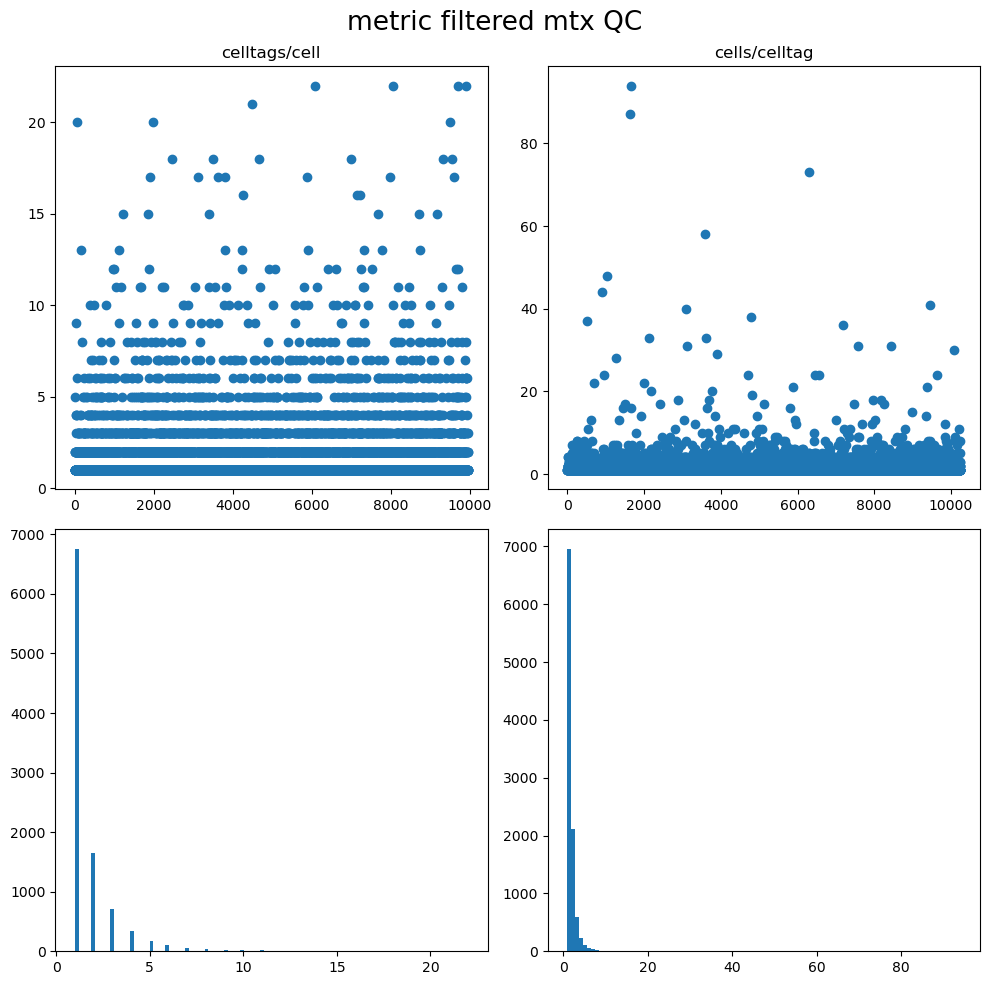

In [12]:
ct.pl.diagnostic_plots(ct_obj, 'metric')

In [11]:
ct_obj.save("celltag_obj_reprogramming.pkl")